# Predictive Model

In this part, we will develop predictive model by using different packages.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

### One hot encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder

# create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# initialize df_new with a copy of df
df_new = df.copy()

# one hot encode Sales Channel and join
sales_encoder = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
sales_encoder = sales_encoder.rename(columns={0:'Internet', 1:'Mobile'})
df_new = df_new.join(sales_encoder)

#one hot encode trip type
trip_encoder = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
trip_encoder = trip_encoder.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_new = df_new.join(trip_encoder)

# drop categorical columns now
df_new.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)

In [5]:
# store the label for supervised learning
label = df['booking_complete']

# drop the label from features
df_new = df_new.drop('booking_complete', axis=1)
df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_new)

#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_new.columns)

# add the labels back to the dataframe
scaled_df['label']  = label

scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


### Balancing the dataset using `SMOTE`

In [7]:
from imblearn.over_sampling import SMOTE

# using imblearn to removing imablance in our dataset
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(scaled_df.drop('label',  axis=1),scaled_df['label'])
print(x_smote.shape)
print(y_smote.shape)

(85044, 14)
(85044,)


In [8]:
x_smote.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808


### Correlation Matrix

<Axes: >

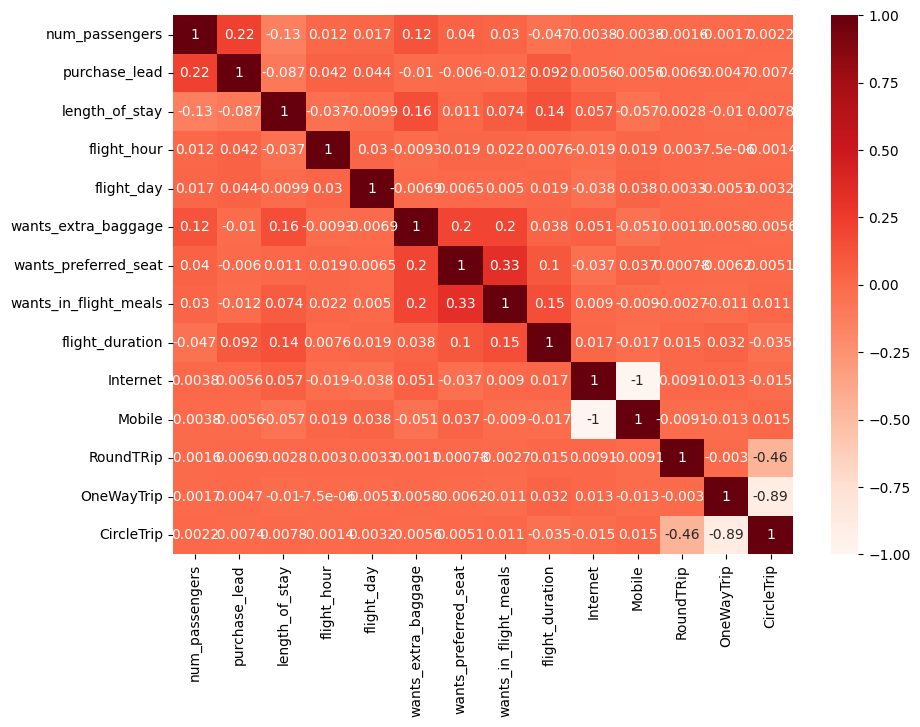

In [9]:
# Calculate the correlation
x_smote = pd.DataFrame(x_smote, columns=df_new.columns)
corr = x_smote.corr()

# Plot the heat
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="Reds")

### Splitting the dataset into training and test set

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(63783, 14)
(63783,)
(21261, 14)
(21261,)


#### Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# using random forest classifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

# predicting the test data
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

In [12]:
# Show perfomance metrics
print("Performance metrics on training set:")
print(confusion_matrix(y_train, y_pred_rf_train))
print("-"*60)
print("Performance metrics test set:")
print(confusion_matrix(y_test, y_pred_rf_test))

Performance metrics on training set:
[[31916     4]
 [    7 31856]]
------------------------------------------------------------
Performance metrics test set:
[[9929  673]
 [1424 9235]]


In [13]:
# show classifiction report
print("Classification report on training set:")
print(classification_report(y_train, y_pred_rf_train))
print("-"*60)
print("Classification report on test set:")
print(classification_report(y_test, y_pred_rf_test))

Classification report on training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31920
           1       1.00      1.00      1.00     31863

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

------------------------------------------------------------
Classification report on test set:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10602
           1       0.93      0.87      0.90     10659

    accuracy                           0.90     21261
   macro avg       0.90      0.90      0.90     21261
weighted avg       0.90      0.90      0.90     21261



In [14]:
from sklearn.model_selection import cross_val_score

## Cross Validation

# Using K-FOLD method by using cross_val_score
accuracy = cross_val_score(rforest, x_train, y_train, cv=30)

In [15]:
# Calculate the average of accuracy
avg_accuracy = round(np.mean(accuracy) * 100, 4)
print(f"The average accuracy of cross validation: {avg_accuracy}%")

The average accuracy of cross validation: 90.4316%


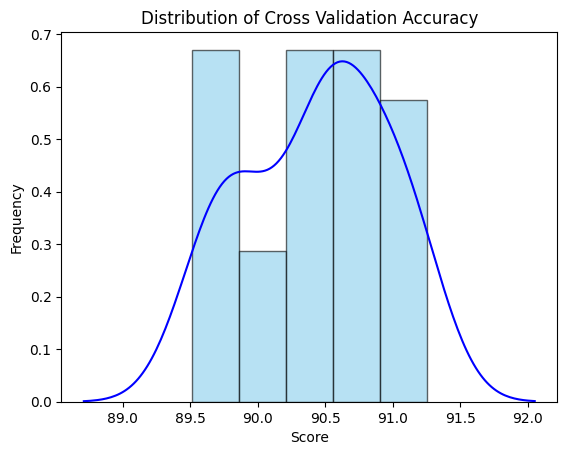

In [16]:
# Create a histogram with density enabled to normalize it
plt.hist((accuracy * 100), bins=5, edgecolor='black', color='skyblue', density=True, alpha=0.6, label='Histogram')

# Overlay the KDE (distribution curve)
sns.kdeplot((accuracy * 100), color='blue', fill=False, label='Density Curve')

# Adding labels and title
plt.title('Distribution of Cross Validation Accuracy')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

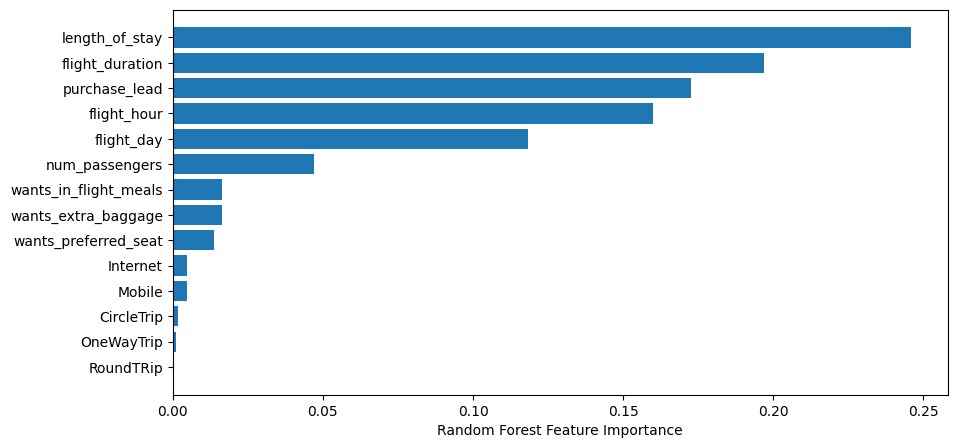

In [17]:
# feature importance
plt.figure(figsize=(10,5))
sorted_idx = rforest.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], rforest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Conclusion
We can see the following variables are the top 5 features which are dependant with booking_complete feature.

1. length_of_stay
2. flight_duration
3. purchase_lead
4. flight_hour
5. flight_day